In [1]:
%run ../src/__init__.py

In [2]:
%run ../src/load_data.py

/home/jovyan/dsi/Capstone/src/load_data.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['attendance'][x] = data.iloc[x + 1]['attendance']
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/pandas/core/g

In [13]:
braves_df = final_drop[final_drop['team']=='ATL'].sort_values('date',axis=0)

In [14]:
braves_df =  team_data_clean(braves_df)

/home/jovyan/dsi/Capstone/src/__init__.py:29: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,min_periods=0,center=False).mean()
  temp_ma = pd.rolling_mean(temp_run_ma_df['runs'],window=5,min_periods=0)


In [15]:
braves_df = add_rival('ATL', braves_df)

In [16]:
new_data=pd.read_pickle('../data/test_data_mlb.pkl')

In [17]:
braves_new = new_data[new_data['team'] == 'ATL'].sort_values('date',axis=0)

In [18]:
braves_new =  test_data_clean(braves_new)

/home/jovyan/dsi/Capstone/src/__init__.py:56: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,min_periods=0,center=False).mean()
  temp_ma = pd.rolling_mean(temp_run_ma_df['runs'],window=5,min_periods=0)


In [19]:
braves_new = add_rival('TOR', braves_new)

In [20]:
braves_data = pd.concat([braves_df, braves_new],axis=0)

In [21]:
braves_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 2189 to 161
Data columns (total 70 columns):
attendance         2233 non-null int64
date               2233 non-null datetime64[ns]
div_rank           2233 non-null int64
double_header      2233 non-null float64
gb                 2233 non-null float64
opening_day        2233 non-null float64
opponent           2233 non-null object
record             2233 non-null float64
runs_allowed_ma    2233 non-null float64
runs_ma            2233 non-null float64
runs_pg            2233 non-null float64
streak             2233 non-null int64
team               2233 non-null object
1990               2233 non-null int64
1991               2233 non-null int64
1992               2233 non-null int64
1993               2233 non-null int64
1994               2233 non-null int64
1995               2233 non-null int64
1996               2233 non-null int64
1997               2233 non-null int64
1998               2233 non-null int64
1999    

,count,mean,std,min,25%,50%,75%,max,skew
runs,2233.0,4.570981,3.070337,0.0,2.000000,4.000000,6.000000,20.0,0.987503
runs_allowed,2233.0,4.109718,3.075522,0.0,2.000000,4.000000,6.000000,23.0,1.149803
innings,2233.0,9.173757,0.819395,0.0,9.000000,9.000000,9.000000,19.0,3.081579
record,2233.0,0.546188,0.119971,0.0,0.487179,0.560976,0.615385,1.0,-0.860212
div_rank,2233.0,2.153157,1.361533,0.0,1.000000,2.000000,3.000000,6.0,1.062961
gb,2233.0,-1.930587,8.847884,-32.0,-5.500000,-1.500000,3.500000,21.5,-0.606911
time,2233.0,173.272279,27.388062,0.0,156.000000,171.000000,187.000000,399.0,1.038998
attendance,2233.0,32937.566055,10547.548115,3415.0,25189.000000,32461.000000,41414.000000,54296.0,-0.149851
runs_pg,2233.0,4.552787,0.891024,0.0,4.184615,4.593496,4.965986,16.0,1.137639
runs_ma,2233.0,4.572153,1.446475,0.0,3.600000,4.400000,5.400000,10.2,0.426685


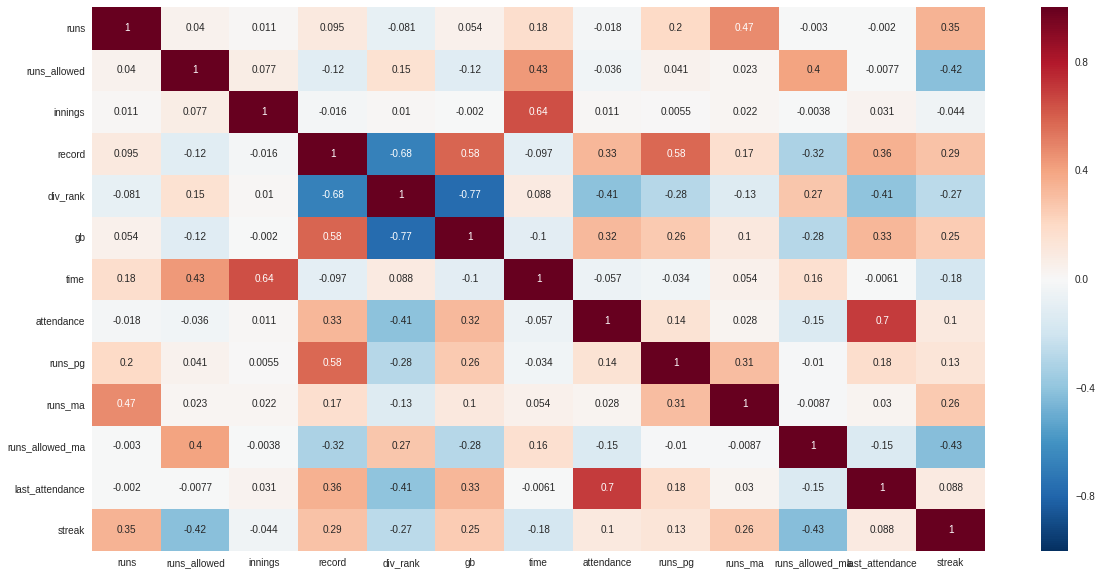

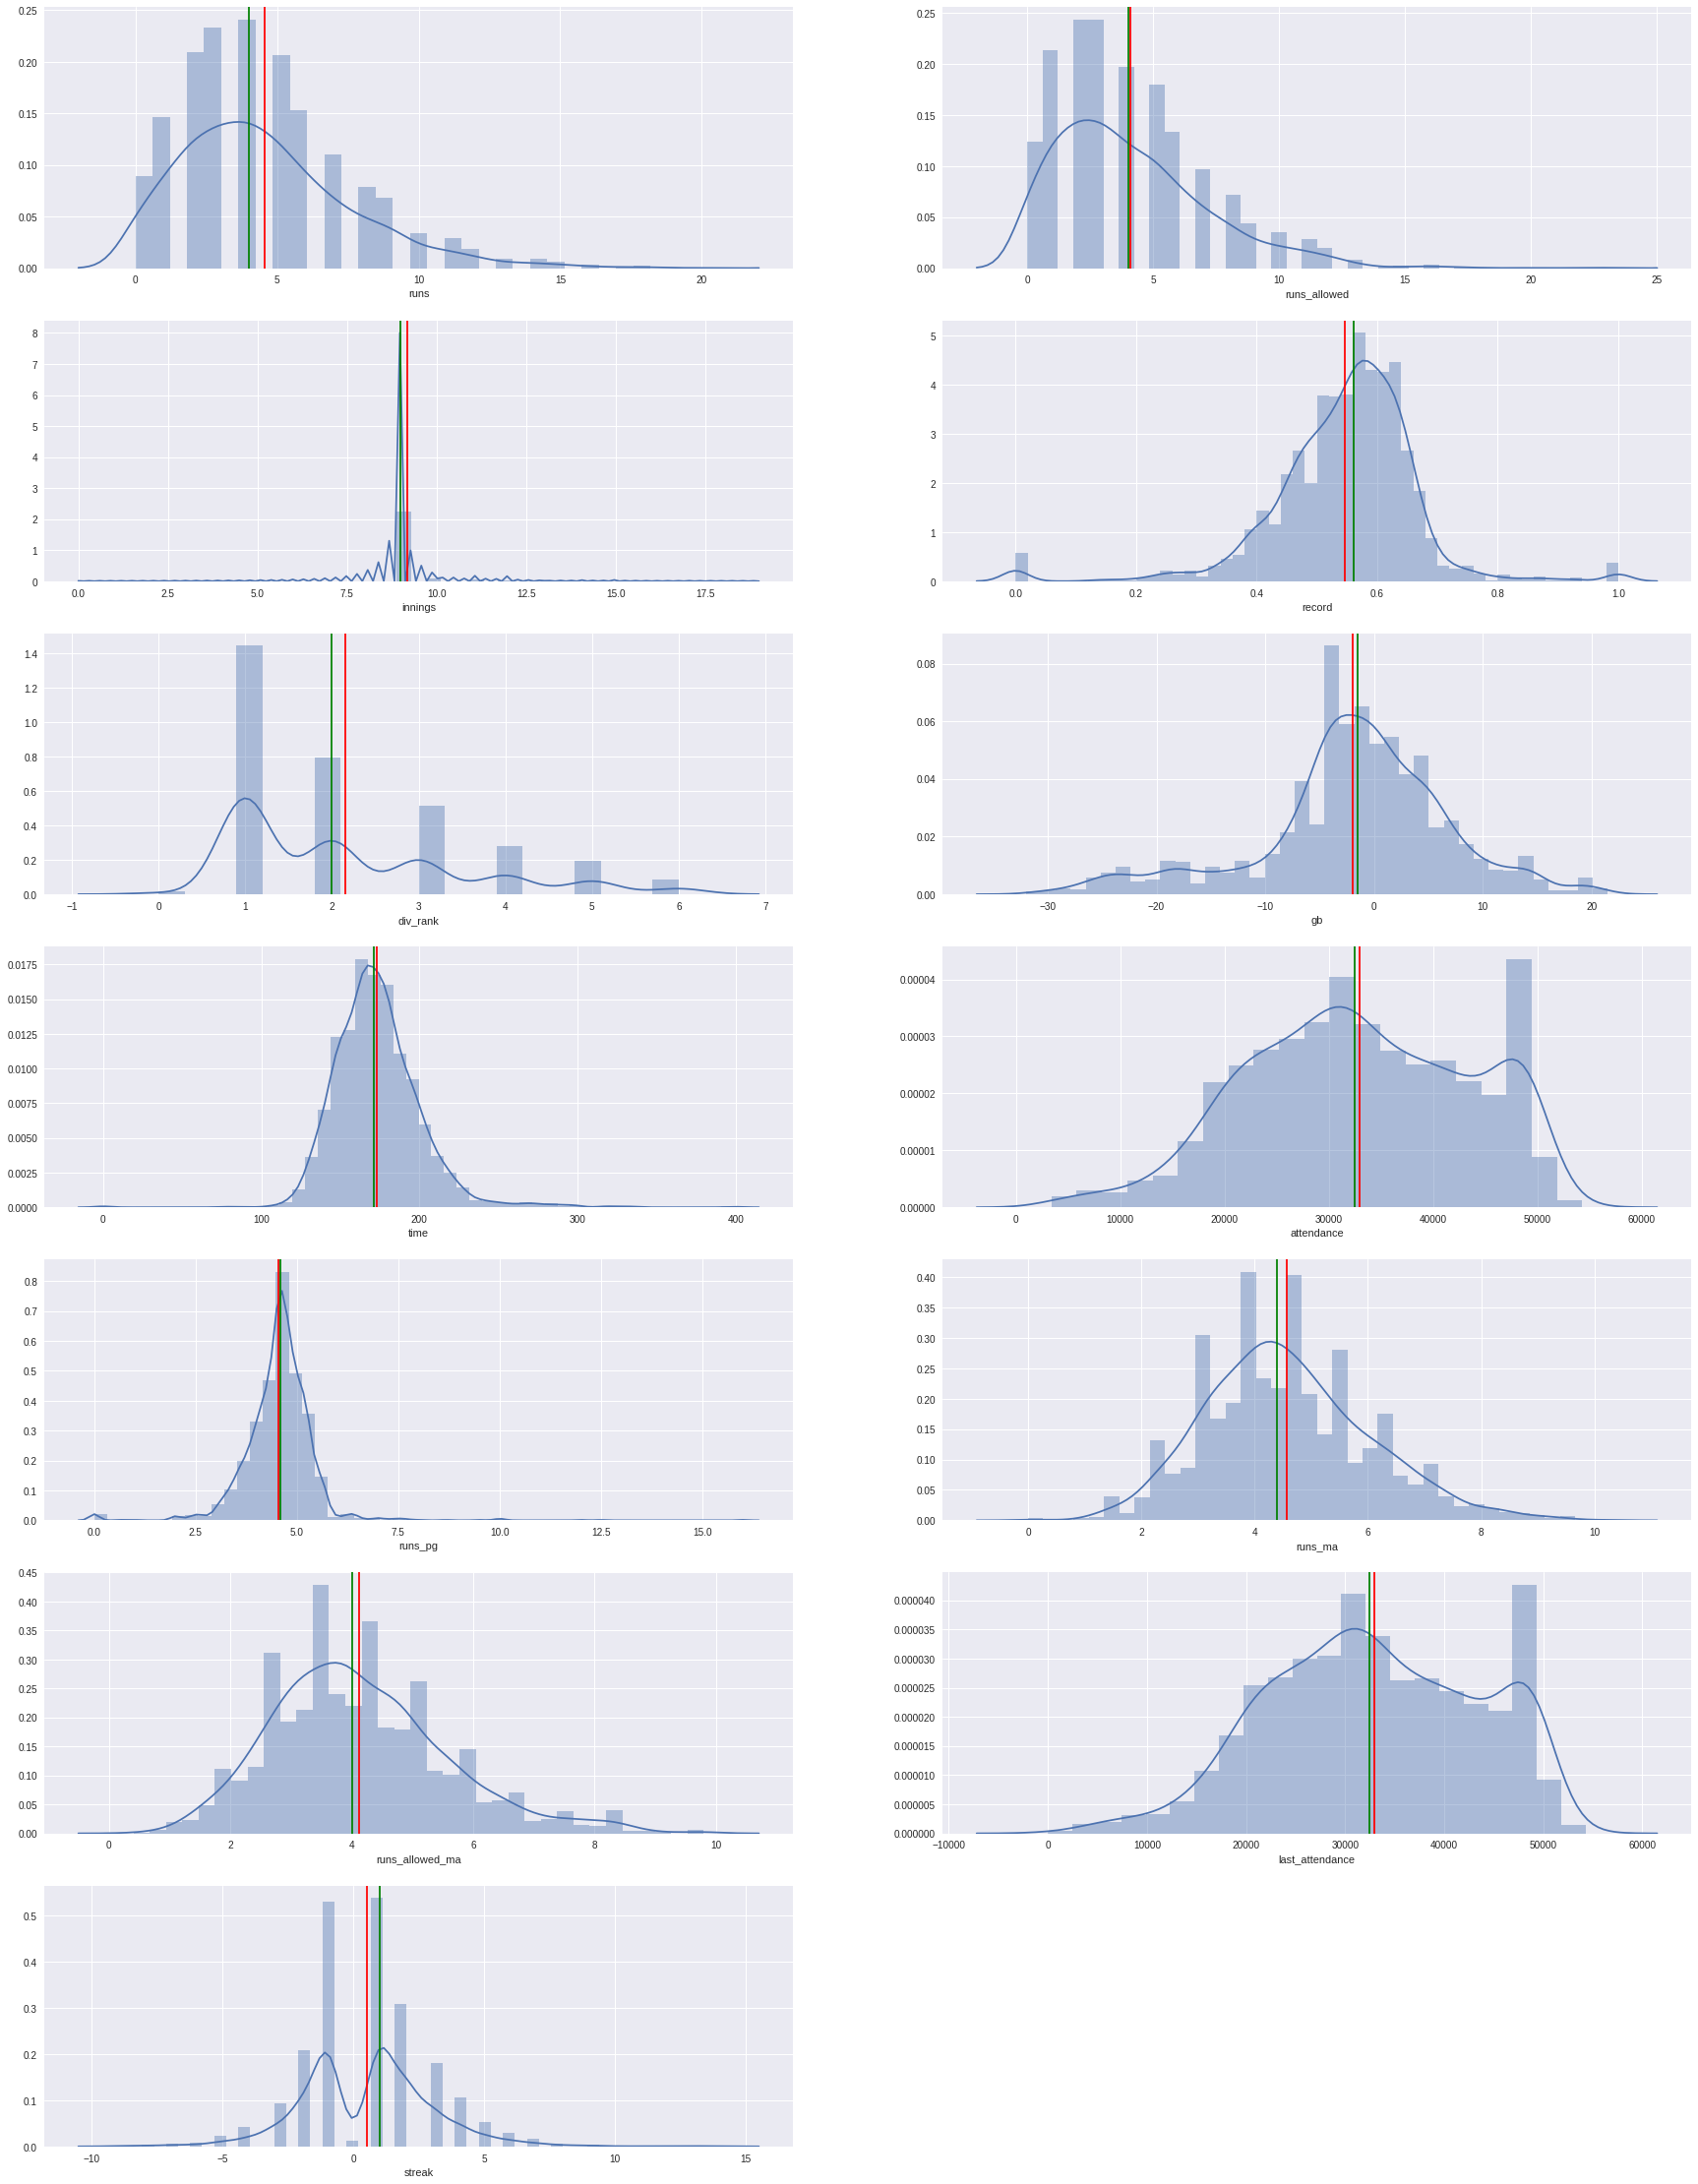

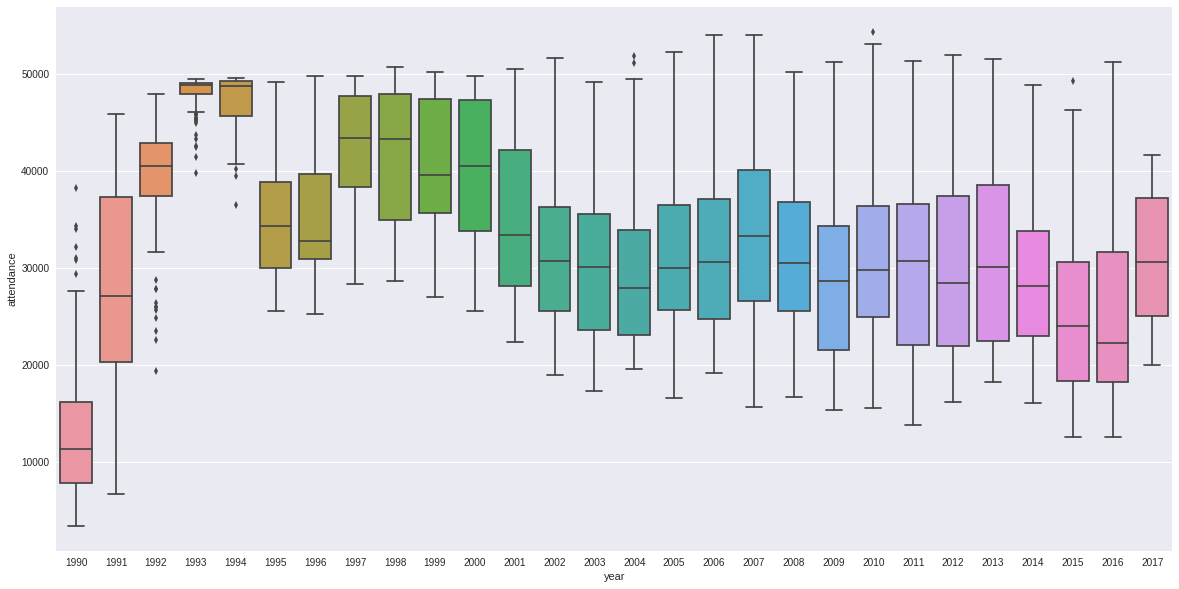

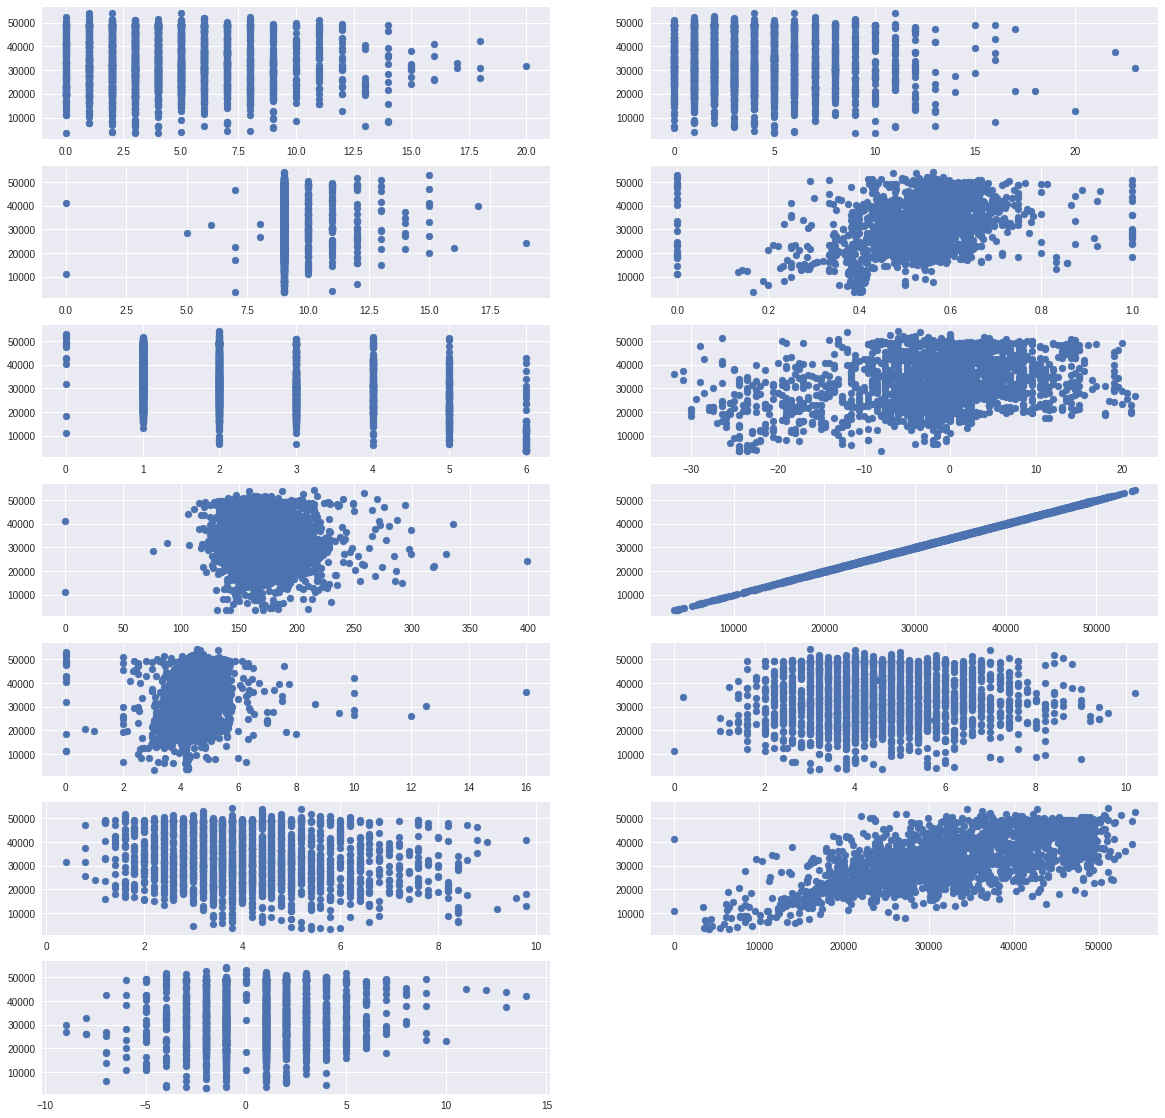

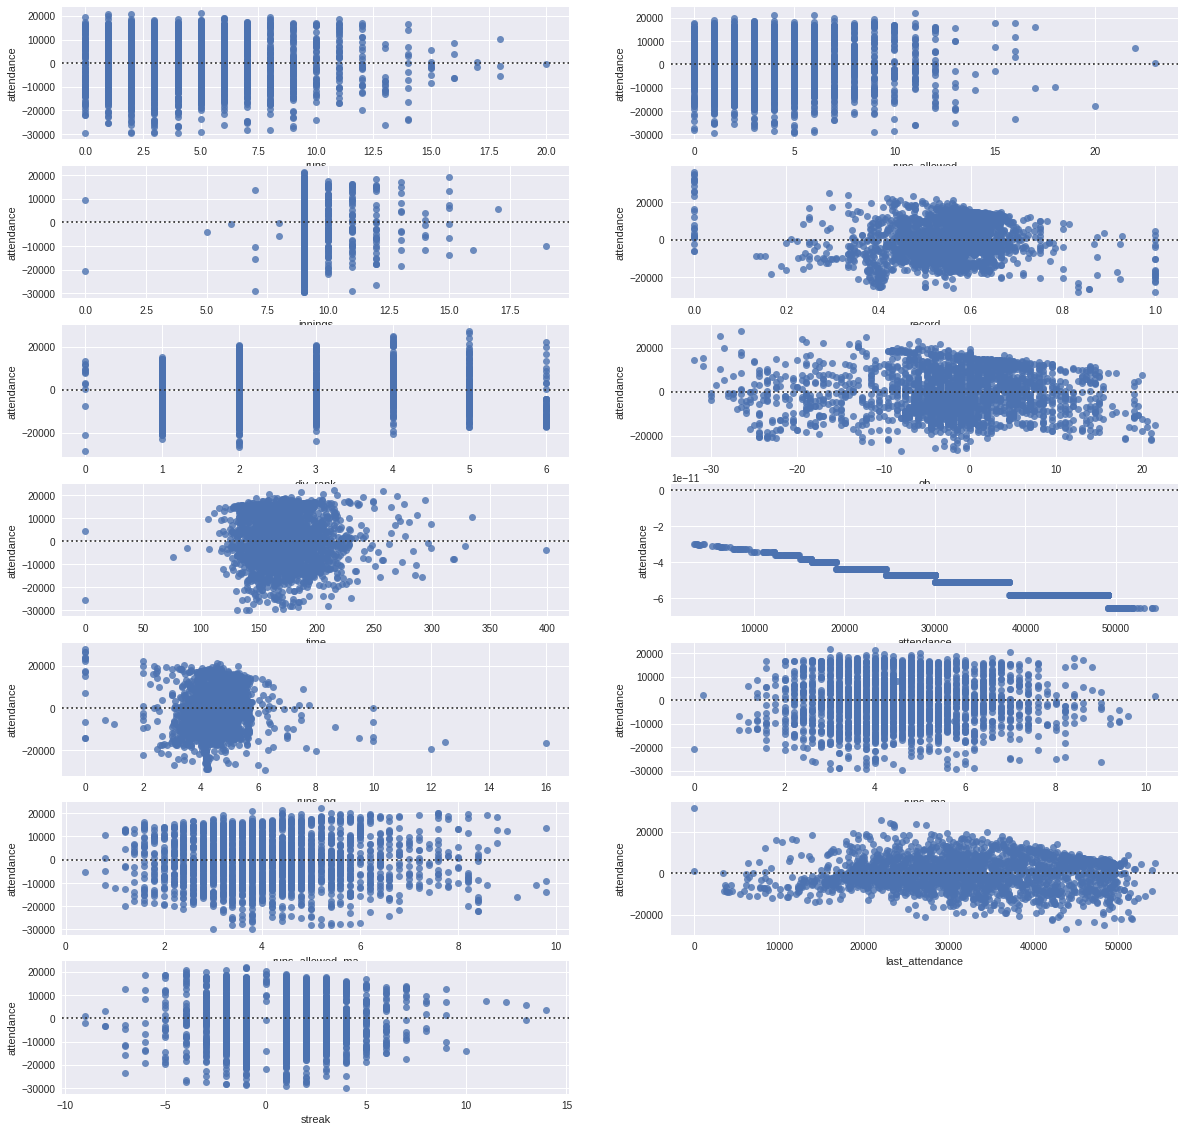

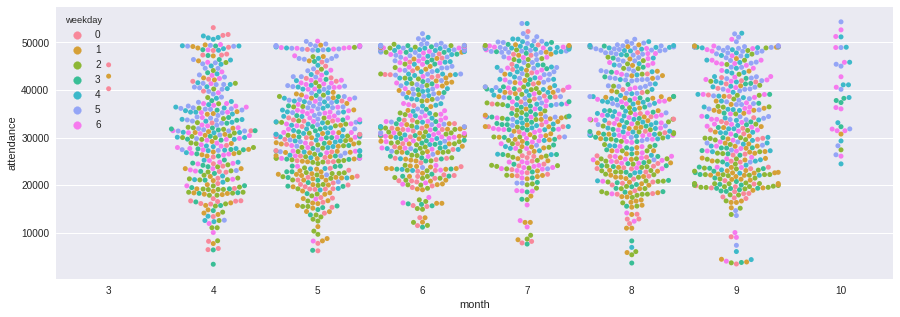

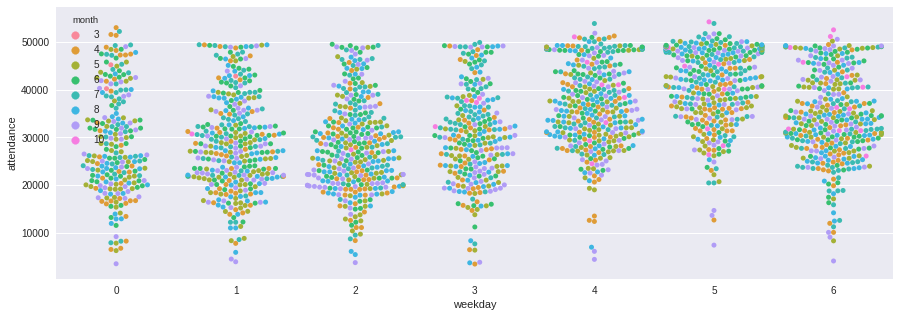

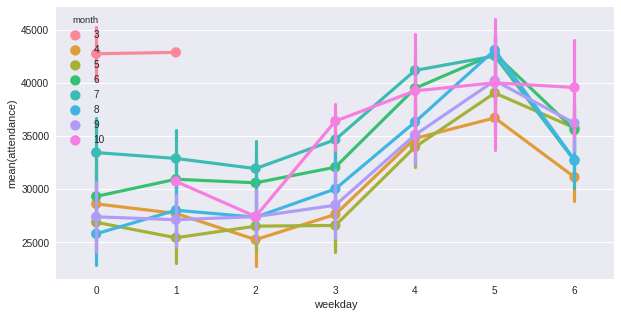

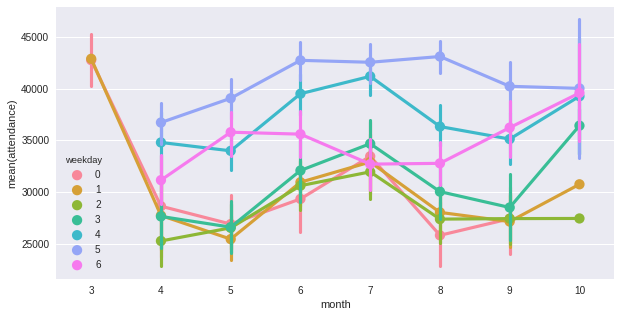

In [22]:
eda(braves_data)

In [23]:
annual_mean_r2(braves_data)

0.4235059071257804

In [24]:
braves_data, feature, target = model_fit_ready(braves_data)

In [25]:
bt = model_fit_score(feature, target)
bt

,train_score,test_score
Bagging_r2,0.939451,0.689877
Decision_tree_r2,1.000000,0.441467
Random_forest_r2,0.937347,0.665698
Gradient_boost_r2,0.788833,0.698803


In [26]:
co_f = feature.copy()
scale = StandardScaler()
feature_sca = pd.DataFrame(scale.fit_transform(co_f),columns=co_f.columns)

In [27]:
scale_fit = model_fit_score(feature_sca, target) 
scale_fit.columns =['scaled_train', 'scaled_test']
scale_fit

,scaled_train,scaled_test
Bagging_r2,0.937302,0.664589
Decision_tree_r2,1.000000,0.424514
Random_forest_r2,0.939615,0.675694
Gradient_boost_r2,0.788833,0.698531


In [28]:
score_table = pd.concat([bt, scale_fit],axis=1)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', DecisionTreeRegressor(criterion='mse', max_depth=9, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='random'))))
Feature top 10 ranking:
1. last_attendance (0.270315)
2. 1990 (0.177544)
3. SA (0.143216)
4. 1993 (0.105333)
5. div_rank (0.093039)
6. F (0.074624)
7. 1994 (0.024767)
8. record (0.011015)
9. runs_pg (0.010049)
10. runs_allowed (0.009788)


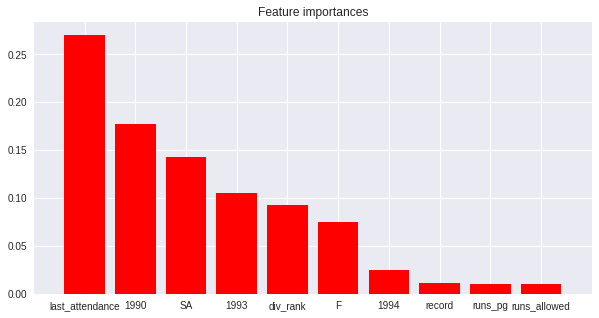

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=17, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))))
Feature top 10 ranking:
1. last_attendance (0.660073)
2. SA (0.078085)
3. F (0.067147)
4. record (0.045148)
5. runs_pg (0.027084)
6. gb (0.017012)
7. 1993 (0.014396)
8. time (0.012263)
9. runs_allowed_ma (0.012257)
10. TH (0.009220)


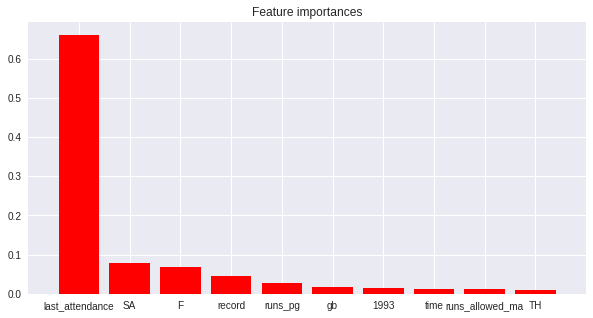

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity...s=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))))
Feature top 10 ranking:
1. last_attendance (0.151203)
2. record (0.067106)
3. SA (0.052565)
4. gb (0.052553)
5. F (0.048409)
6. runs_pg (0.046588)
7. opening_day (0.028859)
8. runs_ma (0.028550)
9. time (0.026982)
10. runs_allowed_ma (0.026322)


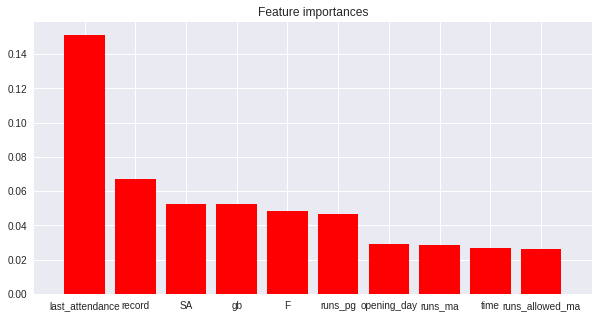

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0,
         max_samples=0.70000000000000007, n_estimators=29, n_jobs=-1,
         oob_score=False, random_state=None, verbose=0, warm_start=False))))
Feature top 10 ranking:
1. div_rank (0.534754)
2. double_header (0.056458)
3. gb (0.054352)
4. opening_day (0.052937)
5. record (0.046346)
6. runs_allowed_ma (0.022374)
7. runs_ma (0.022065)
8. runs_pg (0.021769)
9. streak (0.020200)
10. 1990 (0.014181)


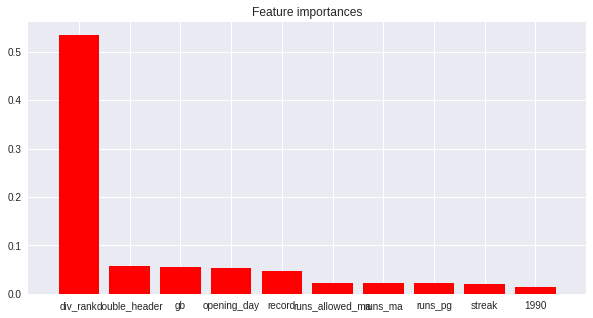

,train_score,test_score,scaled_train,scaled_test,P&O_train_score,P&O_test_score
Bagging_r2,0.939451,0.689877,0.937302,0.664589,0.917296,0.683366
Decision_tree_r2,1.000000,0.441467,1.000000,0.424514,0.728731,0.609631
Random_forest_r2,0.937347,0.665698,0.939615,0.675694,0.775502,0.658525
Gradient_boost_r2,0.788833,0.698803,0.788833,0.698531,0.810160,0.730559


In [29]:
grid_score(feature, target, score_table)

In [30]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(feature.values, i) for i in range(feature.shape[1])]
vif["features"] = feature_sca.columns

/opt/conda/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [31]:
vif.sort_values('VIF',axis=0,ascending=False)[-16:-1]

,VIF,features
0,5.243467,div_rank
2,4.355737,gb
4,4.063861,record
58,2.938634,time
7,2.879710,runs_pg
54,2.856774,last_attendance
56,2.612641,runs_allowed
8,2.460267,streak
57,2.311152,innings
55,2.298023,runs


In [32]:
vif_feature = feature_sca.drop(['div_rank','record','gb'],axis=1)

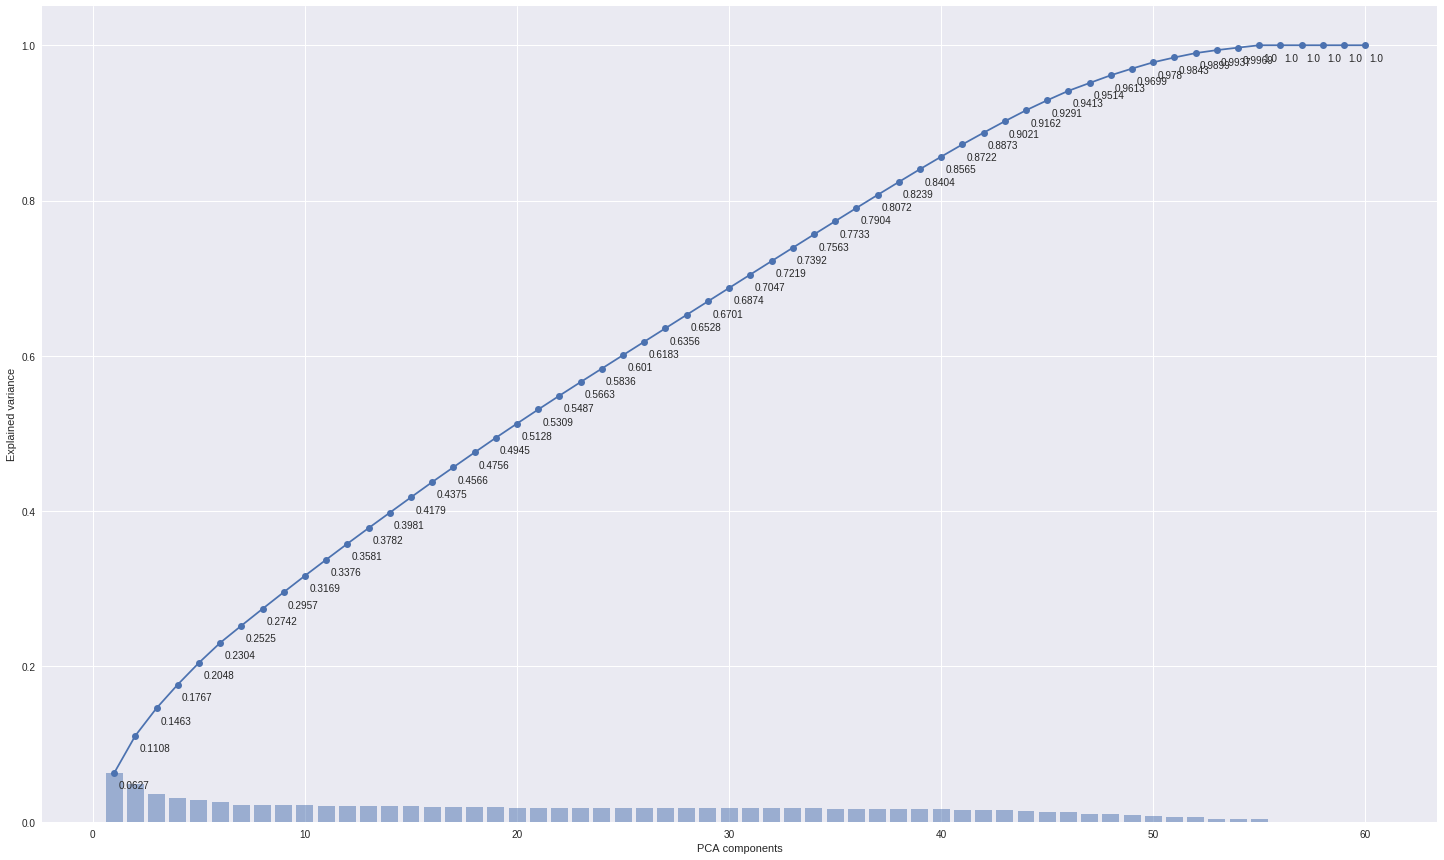

In [33]:
pca = PCA()
feature_pca = pd.DataFrame(pca.fit_transform(vif_feature))


plt.figure(figsize=(25,15))

X = np.arange(1,61)
cumulative_explained_variance_uci = np.cumsum(pca.explained_variance_ratio_)

plt.plot(X, cumulative_explained_variance_uci, '-o')
plt.bar(X, pca.explained_variance_ratio_, align='center', alpha=0.5)

for i, j in zip(X, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)), xy=(i+.2,j-.02))
    
plt.xlabel('PCA components')
plt.ylabel('Explained variance')

In [34]:
non_para_model_fit(vif_feature, target, 50)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


,P&O_train_score,P&O_test_score
Logistic_Regression,0.987682,0.013423
Support Vector Machine,0.732232,0.718258


In [35]:
inter_data, anova_feature, drop_list = interaction_feature(feature, target)

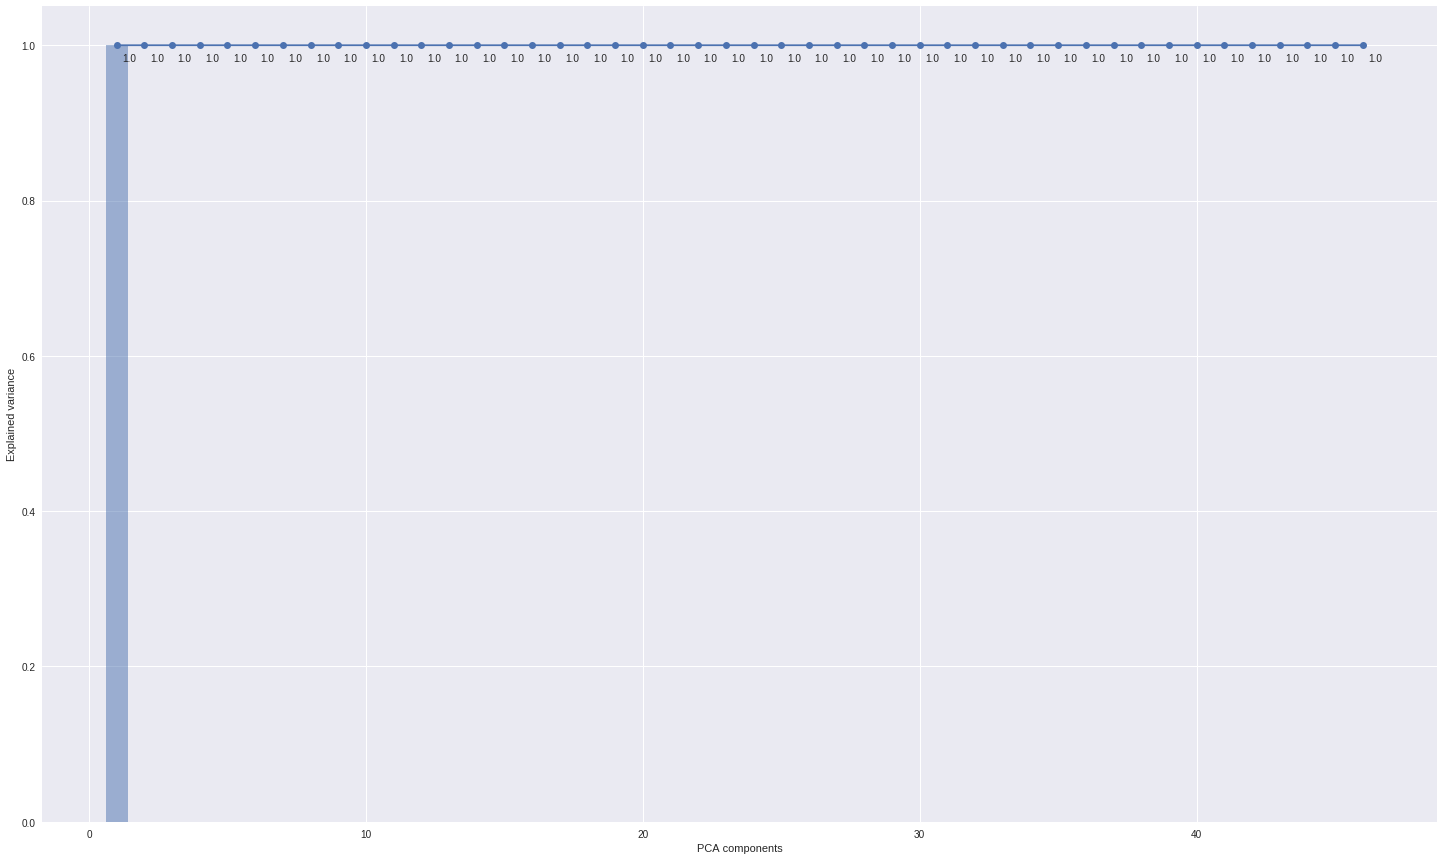

In [36]:
pca = PCA()
feature_pca = pd.DataFrame(pca.fit_transform(anova_feature))

plt.figure(figsize=(25,15))

X = np.arange(1,47)
cumulative_explained_variance_uci = np.cumsum(pca.explained_variance_ratio_)

plt.plot(X, cumulative_explained_variance_uci, '-o')
plt.bar(X, pca.explained_variance_ratio_, align='center', alpha=0.5)

for i, j in zip(X, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)), xy=(i+.2,j-.02))
    
plt.xlabel('PCA components')
plt.ylabel('Explained variance')

In [37]:
non_para_model_fit(anova_feature, target, 1)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


,P&O_train_score,P&O_test_score
Logistic_Regression,0.006159,0.000000
Support Vector Machine,0.725886,0.719178
